In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def model(x,a1,a2,a3):
    return a1+a2*np.sin(a3*x)

In [3]:
x1=np.linspace(0,20,200)
x_exp=np.linspace(0,20)

In [4]:
def datos(t,ai,qi):
    return qi*np.exp(-ai*t)

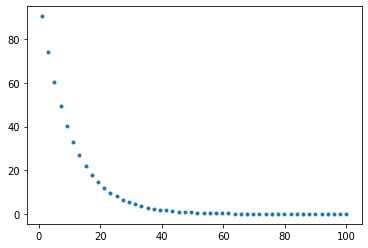

In [5]:
t1=np.linspace(1.0,100,50)
yo=datos(t1,0.1,100)
plt.plot(t1,yo,'.')

In [6]:
def Harm(x,a1,qi):
    return qi/(1+a1*x)

In [7]:
def hlm(x,yreal,a1,qi,lamb):
    Jac=np.zeros((x.shape[0],2))
    for i in range(Jac.shape[0]):
        Jac[i,0]=-qi*x[i]/np.power(1+a1*x[i],2)
        Jac[i,1]=1/(1+a1*x[i])
    J2=np.dot(np.linalg.inv(np.dot(np.transpose(Jac),Jac)+lamb*np.identity(Jac.shape[1])),np.transpose(Jac))
    delta=np.dot(J2,Harm(x,a1,qi)-yreal)
    a1=a1-delta[0]
    qi=qi-delta[1] 
    return a1,qi

In [8]:
hlm(t1,yo,1,1,0.3)

(-75.62415849194113, 105.848712679488)

In [9]:
def Adjust(x,y_real,model,lamb,qi=1,a1=1,a2=1,iterations=150): 
    a1_r=a1 #These values are saved for plotting purposes
    a2_r=a2
    qi_r=qi
    
    y_model=Harm(x,a1_r,qi)
    
    #Calculate the sum of squared residuals
    r2=np.power(y_model-y_real,2)
    s1=np.sqrt(np.sum(r2))
    
    print("The first S is: ",s1)
    a1n=a1
    a2n=a2
    qin=qi
    s=1e30
    c=1
    print("The first Lambda is:",lamb)
    
        
    for c in range(iterations):
        a1=a1n
        qi=qin
        a1n,qin=hlm(x,y_real,a1n,qi,lamb)
        y_model=Harm(x,a1n,qi)
        r2=np.power(y_model-y_real,2)
        s1=np.sqrt(np.sum(r2))
        print('Iteration=%d, Sum=%f, a1=%f, a2=%f, qi=%f, Lambda=%f' % (c,s1,a1n,a2n,qin,lamb))
        
        if abs(s1-s)<1E-10:
            c=c+1
        else:
            c=1
        if s1<0.0001 or c>10:
            print('A correct value has been found: S=%f, a1=%f, a2=%f, qi=%f' % (s1,a1,a2,qi))
            break

        if s1>s or lamb<1E-4:
            lamb=lamb*2
            print('Increasing lambda',lamb)
            a1n=a1
            a2n=a2
            qin=qi
        else:
            lamb=lamb/3
            print('Decreasing lambda',lamb)
            s=s1
                    
    #Plot
    plt.figure(figsize=(15,5))
    plt.plot(x, Harm(x,a1_r,qi),color='red',label='Initial values', lw=5,zorder=0)
    plt.plot(x, Harm(x,a1n,qi),color='green',label='Adjusted values', lw=5,zorder=5) 
    plt.plot(t1, yo,facecolor='none',edgecolor='black',s=100,zorder=10)
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.rc('font', size=8)          # controls default text sizes
    plt.rc('axes', titlesize=20)     # fontsize of the axes title
    plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
    plt.rc('legend', fontsize=14)    # legend fontsize
    plt.rc('figure', titlesize=14)  # fontsize of the figure title
    plt.grid(True)
    plt.show()
    return a1,a2,qi

The first S is:  156.92113082100053
The first Lambda is: 10
Iteration=0, Sum=156.921129, a1=49.994202, a2=1.000000, qi=1.293900, Lambda=10.000000
Decreasing lambda 3.3333333333333335
Iteration=1, Sum=156.915613, a1=49.971692, a2=1.000000, qi=2.175575, Lambda=3.333333
Decreasing lambda 1.1111111111111112
Iteration=2, Sum=156.898998, a1=49.858096, a2=1.000000, qi=4.820644, Lambda=1.111111
Decreasing lambda 0.3703703703703704
Iteration=3, Sum=156.847945, a1=49.100557, a2=1.000000, qi=12.763371, Lambda=0.370370
Decreasing lambda 0.1234567901234568
Iteration=4, Sum=156.662096, a1=42.925154, a2=1.000000, qi=36.851575, Lambda=0.123457
Decreasing lambda 0.0411522633744856
Iteration=5, Sum=158.385108, a1=-24.949657, a2=1.000000, qi=117.164986, Lambda=0.041152
Increasing lambda 0.0823045267489712
Iteration=6, Sum=153.159570, a1=8.544305, a2=1.000000, qi=77.535039, Lambda=0.082305
Decreasing lambda 0.027434842249657063
Iteration=7, Sum=157.554886, a1=-120.473883, a2=1.000000, qi=83.207298, Lambda

AttributeError: 'Line2D' object has no property 'facecolor'

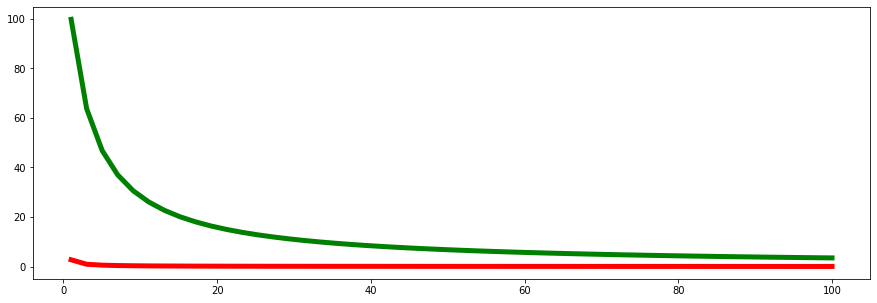

In [10]:
Adjust(t1,yo,'Harmonic',10,qi=1,a1=50)